## Embedding in a Pipeline with Haystack, PgVector and Ollama as Embedder

In [ ]:
from haystack import Pipeline
from haystack_integrations.components.embedders.ollama import OllamaDocumentEmbedder
from haystack.components.preprocessors import DocumentCleaner, DocumentSplitter
from haystack.components.converters import PyPDFToDocument
from haystack.components.writers import DocumentWriter
from haystack.document_stores.types import DuplicatePolicy
from haystack_integrations.document_stores.pgvector import PgvectorDocumentStore

In [2]:
document_store = PgvectorDocumentStore()
document_embedder = OllamaDocumentEmbedder(url="http://192.168.178.82:11434/api/embeddings")

In [3]:
cleaner = DocumentCleaner()
splitter = DocumentSplitter()
file_converter = PyPDFToDocument()
writer = DocumentWriter(document_store=document_store, policy=DuplicatePolicy.OVERWRITE)

In [4]:
indexing_pipeline = Pipeline()

### Add components to pipeline

In [5]:
indexing_pipeline.add_component("embedder", document_embedder)
indexing_pipeline.add_component("converter", file_converter)
indexing_pipeline.add_component("cleaner", cleaner)
indexing_pipeline.add_component("splitter", splitter)
indexing_pipeline.add_component("writer", writer)

### Connect components in pipeline

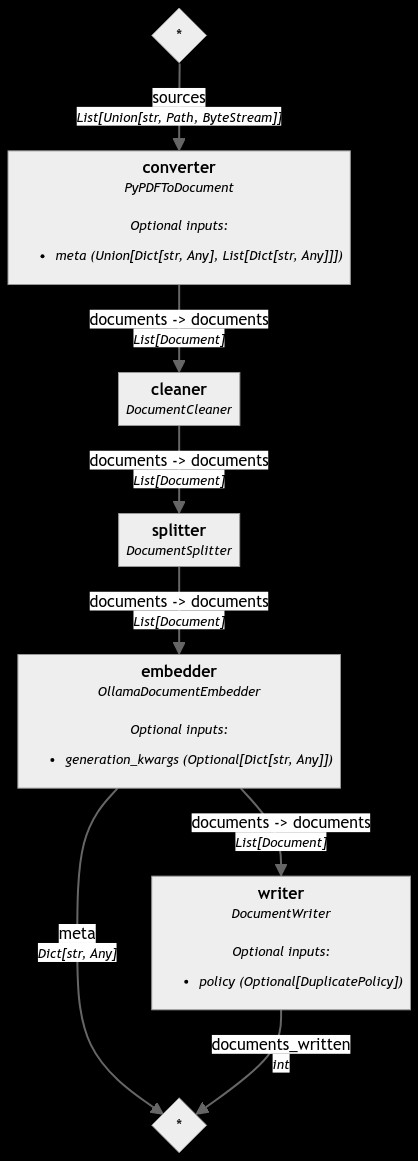

In [6]:
indexing_pipeline.connect("converter", "cleaner")
indexing_pipeline.connect("cleaner", "splitter")
indexing_pipeline.connect("splitter", "embedder")
indexing_pipeline.connect("embedder", "writer")

### Run Pipeline


In [10]:
indexing_pipeline.run({"converter": {"sources": ["../files/test_pdf_data.pdf"]}})

Calculating embeddings: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


{'embedder': {'meta': {'model': 'nomic-embed-text'}},
 'writer': {'documents_written': 1}}